In [1]:
import os
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
os.chdir('C:\\Users\\tommc\\OneDrive\\Documents\\GitHub\\Baseball')
os.listdir()

['366_800020_bundle_archive', 'clean_data.xlsx', 'final_clean_data.xlsx']

# 1. Introduction

This note book contains the preeprosessing and models done on a dataset containing MLB player stats from 1970 - 2015

# 2. Data / Features

In [3]:
data = pd.read_excel('final_clean_data.xlsx')

In [4]:
data

,Unnamed: 0,playerID,yearID,AB,H,2B,3B,HR,SO,BB,total_hits,BA,birthYear,age,last year BA,Last season league avg,career_BA,last_3_seasons_BA,last_3_seaon %change_from_career_BA,last_season_%change_from_career_BA
0,0,mayswi01,1970,403,114,17,3,13,71,49,147,0.384937,1931,39,0.364764,0.306357,0.364764,0.364764,0.000000,0.000000
1,1,aaronha01,1970,547,164,30,3,44,47,87,241,0.424419,1934,36,0.440585,0.306357,0.402675,0.402675,0.000000,0.094146
2,2,bankser01,1970,565,143,19,2,23,101,42,187,0.342342,1931,39,0.330973,0.306357,0.378774,0.378774,0.000000,-0.126199
3,3,kalinal01,1970,456,124,17,0,21,61,54,162,0.372591,1934,36,0.355263,0.306357,0.372896,0.375607,0.007269,-0.047287
4,4,boyercl02,1970,496,124,16,1,14,87,55,155,0.311579,1937,33,0.312500,0.306357,0.360817,0.332912,-0.077338,-0.133910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19848,19848,vogtst01,2014,135,34,6,1,4,28,9,45,0.356877,1984,30,0.333333,0.315568,0.324950,0.315278,-0.029765,0.025799
19849,19849,wongko01,2014,59,9,1,0,0,12,3,10,0.320896,1990,24,0.169492,0.315568,0.321988,0.267608,-0.168887,-0.473609
19850,19850,yelicch01,2014,240,69,12,1,4,66,31,86,0.360825,1991,23,0.358333,0.315568,0.323558,0.287053,-0.112823,0.107479
19851,19851,zuninmi01,2014,173,37,5,0,5,49,16,47,0.299087,1991,23,0.271676,0.315568,0.322340,0.266500,-0.173232,-0.157175


In [5]:
data.columns

Index(['Unnamed: 0', 'playerID', 'yearID', 'AB', 'H', '2B', '3B', 'HR', 'SO',
       'BB', 'total_hits', 'BA', 'birthYear', 'age', 'last year BA',
       'Last season league avg', 'career_BA', 'last_3_seasons_BA',
       'last_3_seaon %change_from_career_BA',
       'last_season_%change_from_career_BA'],
      dtype='object')

In [6]:
data = data.drop('Unnamed: 0',axis=1)

In [7]:
data

,playerID,yearID,AB,H,2B,3B,HR,SO,BB,total_hits,BA,birthYear,age,last year BA,Last season league avg,career_BA,last_3_seasons_BA,last_3_seaon %change_from_career_BA,last_season_%change_from_career_BA
0,mayswi01,1970,403,114,17,3,13,71,49,147,0.384937,1931,39,0.364764,0.306357,0.364764,0.364764,0.000000,0.000000
1,aaronha01,1970,547,164,30,3,44,47,87,241,0.424419,1934,36,0.440585,0.306357,0.402675,0.402675,0.000000,0.094146
2,bankser01,1970,565,143,19,2,23,101,42,187,0.342342,1931,39,0.330973,0.306357,0.378774,0.378774,0.000000,-0.126199
3,kalinal01,1970,456,124,17,0,21,61,54,162,0.372591,1934,36,0.355263,0.306357,0.372896,0.375607,0.007269,-0.047287
4,boyercl02,1970,496,124,16,1,14,87,55,155,0.311579,1937,33,0.312500,0.306357,0.360817,0.332912,-0.077338,-0.133910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19848,vogtst01,2014,135,34,6,1,4,28,9,45,0.356877,1984,30,0.333333,0.315568,0.324950,0.315278,-0.029765,0.025799
19849,wongko01,2014,59,9,1,0,0,12,3,10,0.320896,1990,24,0.169492,0.315568,0.321988,0.267608,-0.168887,-0.473609
19850,yelicch01,2014,240,69,12,1,4,66,31,86,0.360825,1991,23,0.358333,0.315568,0.323558,0.287053,-0.112823,0.107479
19851,zuninmi01,2014,173,37,5,0,5,49,16,47,0.299087,1991,23,0.271676,0.315568,0.322340,0.266500,-0.173232,-0.157175


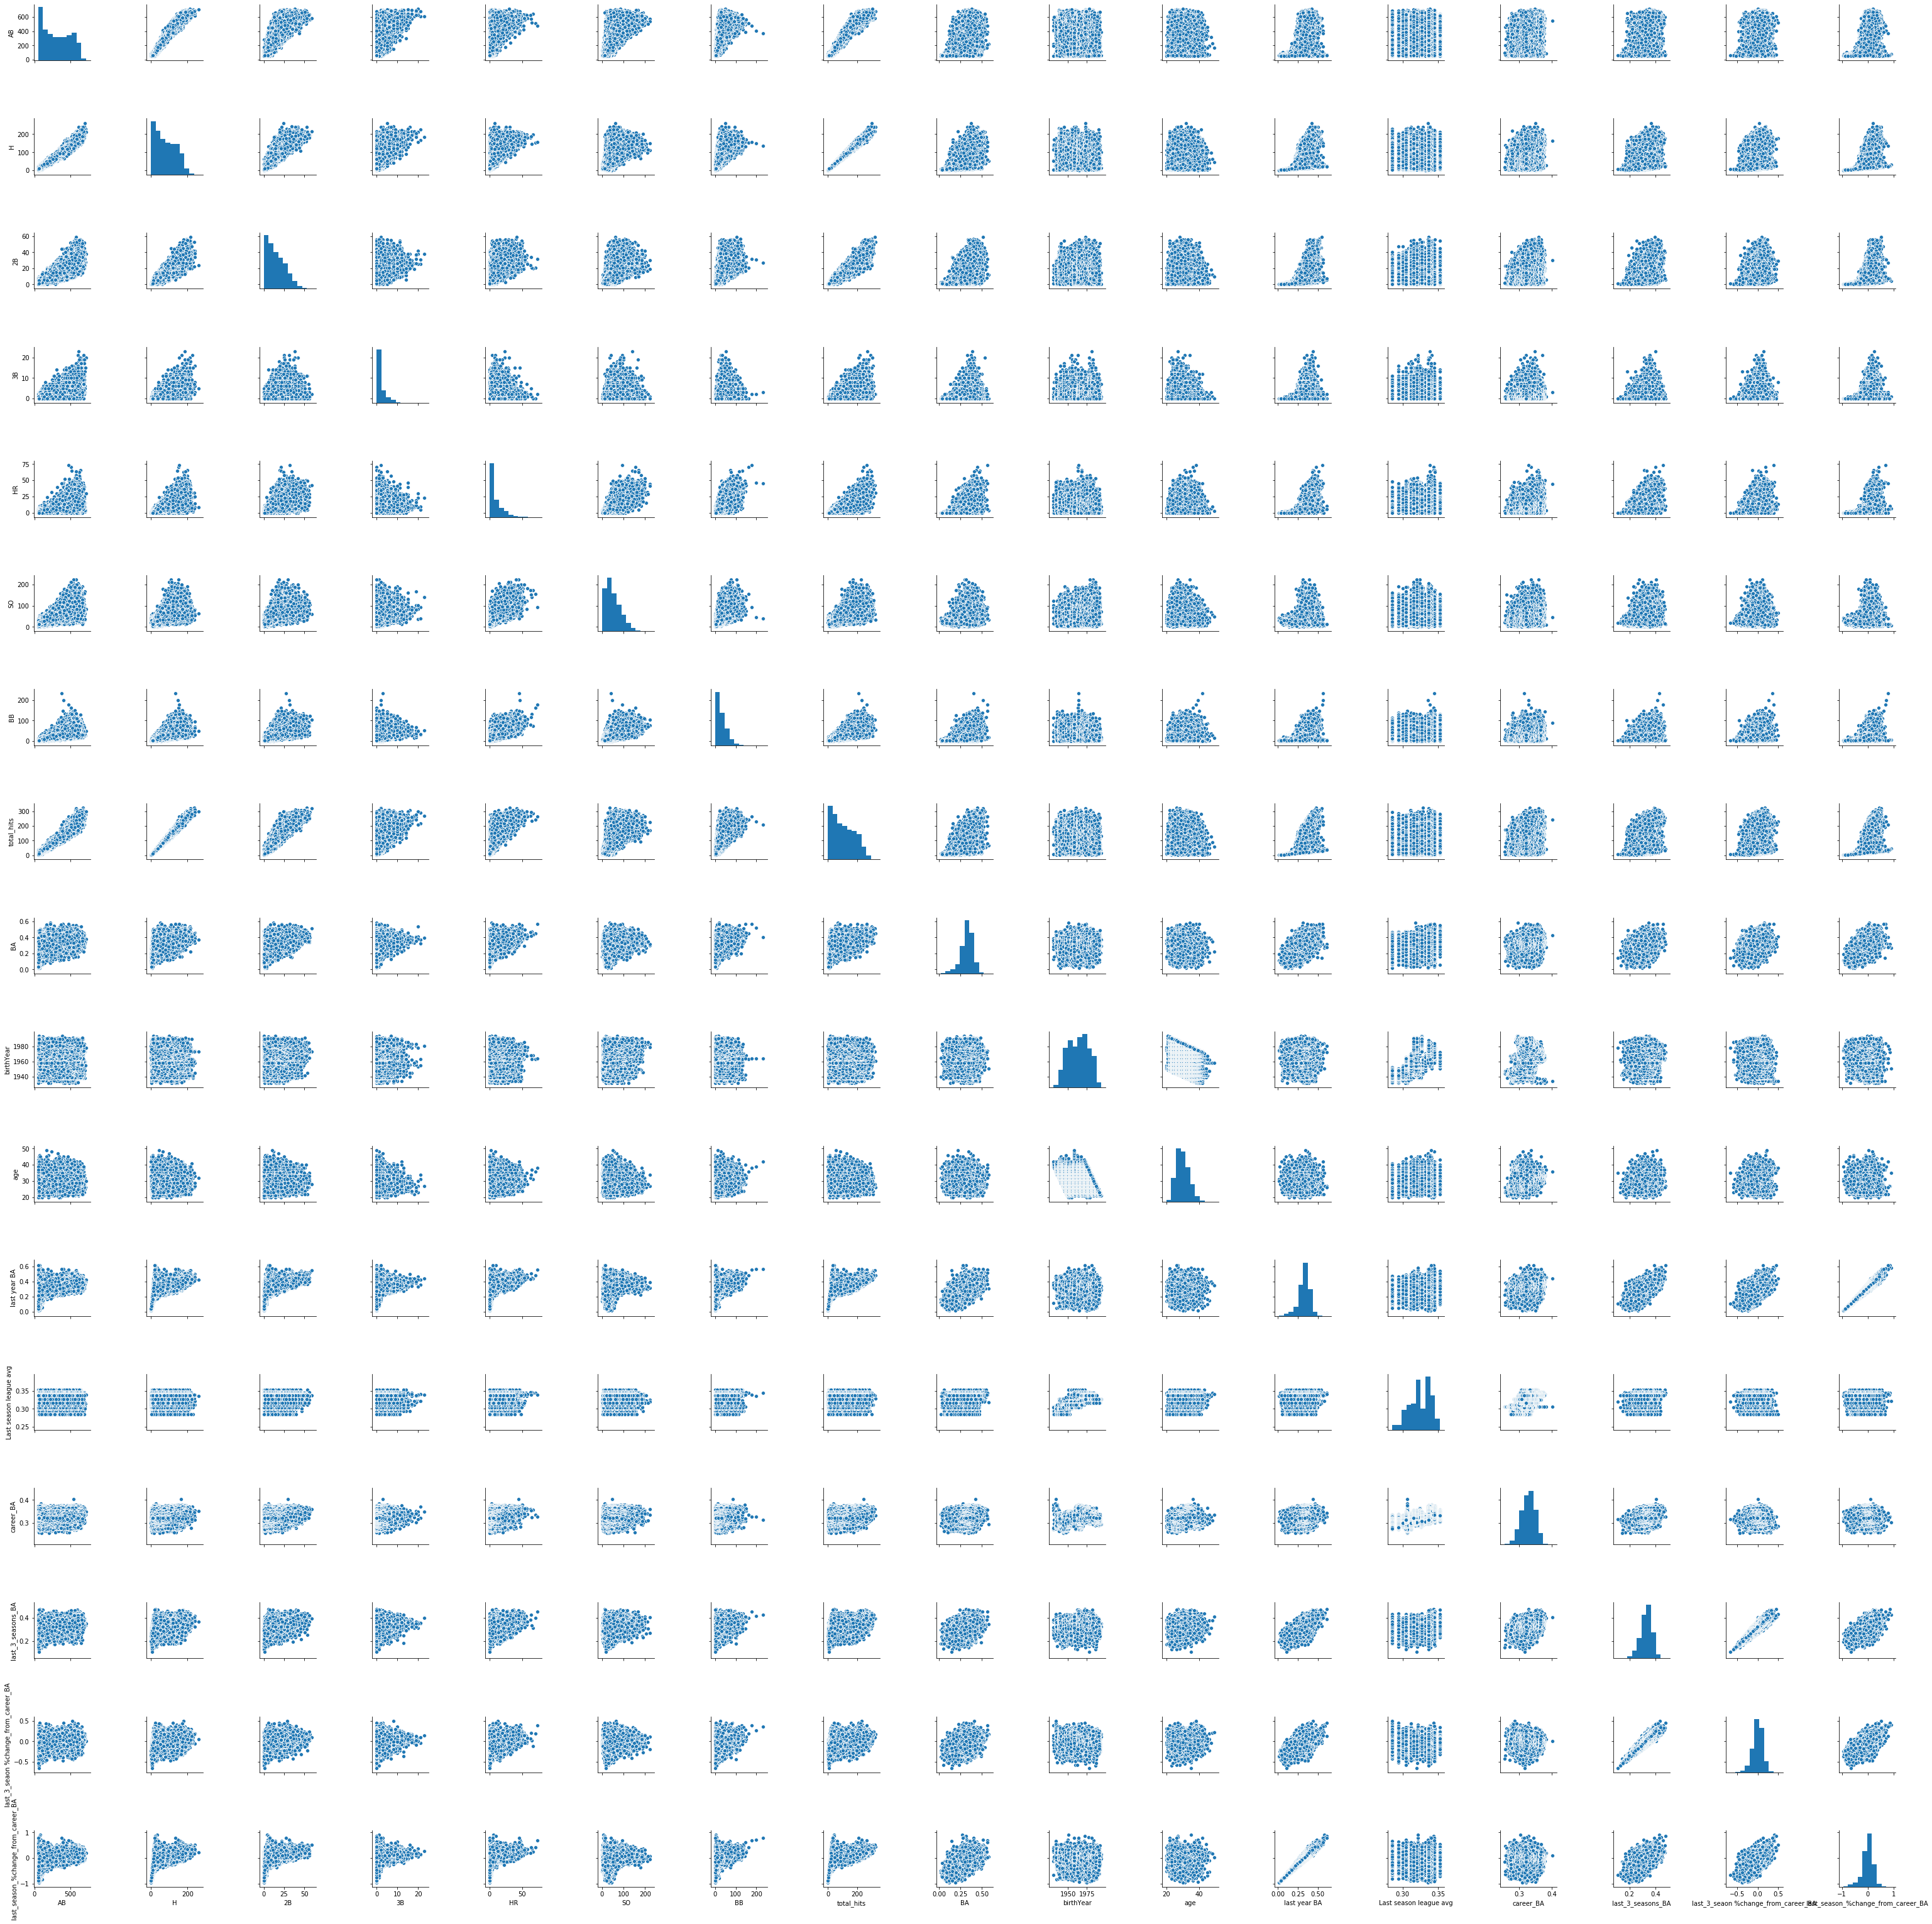

In [8]:
sns.pairplot(data.drop(['playerID','yearID'],axis=1))

In [9]:
### This is where I dropped features that do not play a row in the 
### models and created the target variable then scalled the data

In [10]:
X = data.drop(['playerID','BA','yearID','birthYear','Last season league avg'],axis=1)
y = data.BA
scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)

# 3. Modeling

In [ ]:
### Spliting the data and making the first linear regression model

In [11]:
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=.25, random_state=1)

In [12]:
from sklearn import linear_model
from sklearn.metrics import explained_variance_score,mean_absolute_error
lm = linear_model.LinearRegression()
model = lm.fit(X_train,y_train)

In [13]:
print(y_train)

6294     0.374291
12943    0.314711
10128    0.307692
758      0.312195
1868     0.258929
           ...   
10955    0.351145
17289    0.327103
5192     0.310811
12172    0.301587
235      0.292135
Name: BA, Length: 14889, dtype: float64


In [14]:
y_pred = model.predict(X_test)

In [ ]:
### Use explained variance and mean absolute error to get an idea of how well the model works

In [15]:
explained_variance_score(y_test,y_pred)

0.350364689535937

In [16]:
mean_absolute_error(y_test,y_pred)

0.043078752879043836

In [17]:
lm.intercept_

0.324819958643167

In [18]:
df_model = pd.DataFrame(abs(lm.coef_), X.columns, columns=['Coefficient'],)

In [19]:
df_model.sort_values(by='Coefficient',ascending=False)

,Coefficient
AB,0.037026
last_season_%change_from_career_BA,0.022776
H,0.018954
career_BA,0.014286
total_hits,0.012632
HR,0.011028
SO,0.010469
last year BA,0.010010
age,0.007353
BB,0.005709


In [ ]:
### Plotting a graph of what was predicted by the model vs the actual measurements 

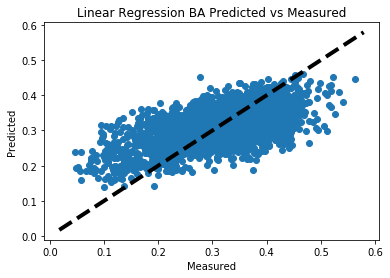

In [20]:
plt.scatter(y_test,y_pred)
plt.plot([y.min(),y.max()],[y.min(),y.max()],'k--',lw=4)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('Linear Regression BA Predicted vs Measured')
plt.show()


In [21]:
### Below is the second Linear Regression Model selecting all
### data before 2005 as the training data and everything after
### as testing data

In [75]:
X_train2 = data[data['yearID']<=2005]

In [23]:
y_train2 = X_train2['BA']

In [76]:
X_train2 = X_train2.drop(['playerID','BA','yearID','Last season league avg','birthYear'],axis =1)

In [77]:
X_train2 = scaler.transform(X_train2)

In [78]:
X_train2

array([[ 5.13375445e-01,  5.83105116e-01,  1.68351092e-01, ...,
         8.33996421e-01, -1.14573474e-04, -1.52500725e-04],
       [ 1.30006912e+00,  1.50374664e+00,  1.33581663e+00, ...,
         1.70081304e+00, -1.14573474e-04,  4.51986852e-01],
       [ 1.39840583e+00,  1.11707720e+00,  3.47961175e-01, ...,
         1.15433302e+00, -1.14573474e-04, -6.06223084e-01],
       ...,
       [-1.03960565e-01, -1.16582441e-01, -3.70479157e-01, ...,
        -6.81987486e-01, -3.72309381e-01,  8.14011104e-01],
       [-2.51465630e-01, -9.81696104e-02,  1.68351092e-01, ...,
         3.98160770e-01,  8.57691673e-01,  1.55230438e+00],
       [-5.51938909e-01, -5.21664710e-01, -3.70479157e-01, ...,
         1.07656973e+00,  1.67804604e+00,  5.25049739e-01]])

In [74]:
X_train2.columns

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [27]:
y_train2

0        0.384937
1        0.424419
2        0.342342
3        0.372591
4        0.311579
           ...   
15082    0.261194
15083    0.257143
15084    0.326409
15085    0.427826
15086    0.379747
Name: BA, Length: 15087, dtype: float64

In [28]:
X_test2 = data[data['yearID']>2005]

In [29]:
y_test2 = X_test2['BA']

In [30]:
X_test2 = X_test2.drop(['playerID','BA','yearID','Last season league avg','birthYear'],axis =1)

In [81]:
X_test2 = scaler.transform(X_test2)

In [83]:
X_test2

array([[-0.41536015, -0.33753641, -0.28067412, ...,  1.10386638,
         1.71969186,  0.88390251],
       [ 0.34948093,  0.96977455,  1.06640151, ...,  2.23609031,
         2.91352006,  3.77966939],
       [ 1.5349846 ,  1.35644399,  2.23386704, ...,  2.4785516 ,
         3.02203193,  0.87364996],
       ...,
       [-0.37711809, -0.24547225, -0.28067412, ..., -0.94286968,
        -0.93278964,  0.51601878],
       [-0.74314918, -0.83468283, -0.9093094 , ..., -1.41279686,
        -1.43217014, -0.75498623],
       [-0.31156029, -0.33753641, -0.10106403, ..., -0.16405498,
        -0.02189943,  0.16945482]])

In [33]:
y_test2

15087    0.345455
15088    0.403270
15089    0.344891
15090    0.188679
15091    0.370861
           ...   
19848    0.356877
19849    0.320896
19850    0.360825
19851    0.299087
19852    0.313364
Name: BA, Length: 4766, dtype: float64

In [84]:
lm2 = linear_model.LinearRegression()
model2 = lm2.fit(X_train2,y_train2)

In [85]:
y_pred2 = model2.predict(X_test2)

In [ ]:
### As with the first model print explained variance and mean absolute error to get an idea of how well the model did

In [86]:
explained_variance_score(y_test2,y_pred2)

0.338974893584435

In [87]:
mean_absolute_error(y_test2,y_pred2)

0.04332312827083042

In [88]:
lm2.intercept_

0.3247861392178982

In [89]:
df_model2 = pd.DataFrame(abs(lm2.coef_), X.columns, columns=['Coefficient'],)

In [90]:
df_model2.sort_values(by='Coefficient',ascending=False)

,Coefficient
last_season_%change_from_career_BA,0.033691
AB,0.031460
H,0.016958
career_BA,0.015080
HR,0.011382
total_hits,0.010805
SO,0.009966
age,0.006416
BB,0.005246
last_3_seasons_BA,0.003836


In [ ]:
### Plotting a graph of what was predicted by the model vs the actual measurements 

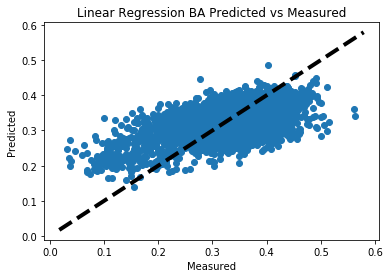

In [91]:
plt.scatter(y_test2,y_pred2)
plt.plot([y.min(),y.max()],[y.min(),y.max()],'k--',lw=4)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('Linear Regression BA Predicted vs Measured')
plt.show()


In [ ]:
### Using a random forest model as well to see what maodel works better

In [42]:
from sklearn.ensemble import RandomForestRegressor
RFmodel = RandomForestRegressor(n_estimators = 100,random_state=1)

In [43]:
X_train3,X_test3,y_train3,y_test3 = X_train,X_test,y_train,y_test

In [44]:
RFmodel.fit(X_train3,y_train3)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=1, verbose=0,
                      warm_start=False)

In [45]:
y_pred3 = RFmodel.predict(X_test3)

In [46]:
explained_variance_score(y_test3,y_pred3)

0.35925876372068877

In [47]:
mean_absolute_error(y_test3,y_pred3)

0.042633156451498996

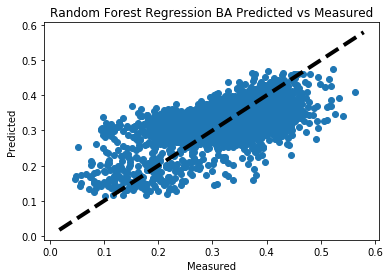

In [92]:
plt.scatter(y_test3,y_pred3)
plt.plot([y.min(),y.max()],[y.min(),y.max()],'k--',lw=4)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('Random Forest Regression BA Predicted vs Measured')
plt.show()

In [48]:
RFmodel2 = RandomForestRegressor(n_estimators=100,max_depth=5,random_state=1)

In [49]:
RFmodel2.fit(X_train3,y_train3)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=1, verbose=0,
                      warm_start=False)

In [50]:
y_predRF = RFmodel2.predict(X_test3)

In [51]:
explained_variance_score(y_test3,y_predRF)

0.37525388958729033

In [52]:
mean_absolute_error(y_test3,y_predRF)

0.04214540553763126

In [ ]:
### printing out the feature importance for both random forest models to see what features are being used more heavily
### in decision making

In [96]:
important_featuresRF2 = pd.Series(data=RFmodel2.feature_importances_,index=X.columns)
important_featuresRF2.sort_values(ascending=False,inplace=True)

In [97]:
important_featuresRF2

last year BA                           0.669679
HR                                     0.132002
total_hits                             0.058953
BB                                     0.040349
last_season_%change_from_career_BA     0.037872
SO                                     0.035193
career_BA                              0.009797
AB                                     0.004905
last_3_seasons_BA                      0.003082
H                                      0.002584
age                                    0.002199
last_3_seaon %change_from_career_BA    0.001668
2B                                     0.001395
3B                                     0.000322
dtype: float64

In [98]:
important_featuresRF = pd.Series(data=RFmodel.feature_importances_,index=X.columns)
important_featuresRF.sort_values(ascending=False,inplace=True)

In [99]:
important_featuresRF

last year BA                           0.332534
HR                                     0.079355
last_season_%change_from_career_BA     0.068383
SO                                     0.066631
career_BA                              0.065731
BB                                     0.064368
last_3_seasons_BA                      0.053470
total_hits                             0.052164
last_3_seaon %change_from_career_BA    0.049874
age                                    0.044614
AB                                     0.040010
H                                      0.032453
2B                                     0.031681
3B                                     0.018732
dtype: float64

# 4. Results

In [ ]:
### After seeing that Random Forests are preforming better, find the best paramaters for the model using Gridsearch

In [55]:
from sklearn.model_selection import GridSearchCV

In [56]:
max_depth = [5,10,20]
min_sample_leaf = [5,50]

In [57]:
param_grid = {'max_depth': max_depth,'min_samples_leaf': min_sample_leaf}

In [58]:
print(X_train)
print(y_train)

[[ 1.68248966  1.46692098  1.24601159 ... -0.14702168 -0.00337094
   0.53976056]
 [ 1.25636392  1.79835192  0.16835109 ...  0.56970697 -0.04670658
   0.26431238]
 [-1.10371711 -1.14770095 -0.63989428 ... -0.03950604 -0.66793004
  -1.01249564]
 ...
 [ 1.78628952  1.76152626  0.6173763  ...  0.11612889 -0.17693334
  -0.30286517]
 [-0.53008631 -0.66896735 -0.72969932 ... -0.58664162 -0.60228638
  -0.91616738]
 [ 0.15827066 -0.06134395 -0.63989428 ... -2.21208444 -1.61716068
  -0.3107917 ]]
6294     0.374291
12943    0.314711
10128    0.307692
758      0.312195
1868     0.258929
           ...   
10955    0.351145
17289    0.327103
5192     0.310811
12172    0.301587
235      0.292135
Name: BA, Length: 14889, dtype: float64


In [59]:
RFmodel3 = RandomForestRegressor(n_estimators=100,criterion='mae')
RFmodel_cv = GridSearchCV(RFmodel3,param_grid,cv=5)

In [60]:
print(param_grid)

{'max_depth': [5, 10, 20], 'min_samples_leaf': [5, 50]}


In [61]:
RFmodel_cv.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mae',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': [5, 10, 20], 'min_sam

In [62]:
print("Best Score:" + str(RFmodel_cv.best_score_))
print("Best Parameters: " + str(RFmodel_cv.best_params_))

Best Score:0.40851326428004153
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 5}


In [ ]:
### Using the best paramaters from the gridsearch model the best random forest

In [63]:
RFfinal = RandomForestRegressor(n_estimators=1000,max_depth=10,min_samples_leaf=5,criterion='mae')

In [64]:
RFfinal.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mae', max_depth=10,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=5, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=1000,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [65]:
y_predfinal = RFfinal.predict(X_test)

In [66]:
explained_variance_score(y_test,y_predfinal)

0.3801250379997435

In [67]:
mean_absolute_error(y_test,y_predfinal)

0.04191658959497644

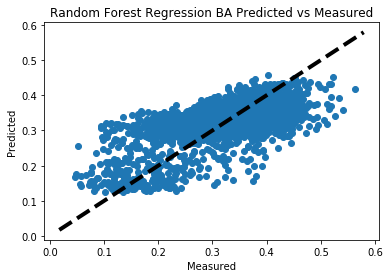

In [100]:
plt.scatter(y_test,y_predfinal)
plt.plot([y.min(),y.max()],[y.min(),y.max()],'k--',lw=4)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('Random Forest Regression BA Predicted vs Measured')
plt.show()

In [68]:
important_features = pd.Series(data=RFfinal.feature_importances_,index=X.columns)
important_features.sort_values(ascending=False,inplace=True)

In [69]:
important_features

last year BA                           0.485066
HR                                     0.094202
total_hits                             0.058872
SO                                     0.052658
BB                                     0.051577
last_season_%change_from_career_BA     0.049848
career_BA                              0.049103
last_3_seasons_BA                      0.030623
age                                    0.030040
last_3_seaon %change_from_career_BA    0.027927
AB                                     0.026035
H                                      0.019503
2B                                     0.016657
3B                                     0.007889
dtype: float64